In [2]:
import pandas as pd

In [3]:
data1 = pd.read_csv('2014년 졸음운전 교통사고.csv',encoding='euc-kr') 
data2 = pd.read_csv('2015년 졸음운전 교통사고.csv',encoding='euc-kr') 
data3 = pd.read_csv('2016년 졸음운전 교통사고.csv',encoding='euc-kr') 

In [4]:
data1

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358
3,2014년4월,182,4,360
4,2014년5월,218,17,474
5,2014년6월,233,13,457
6,2014년7월,229,14,431
7,2014년8월,222,9,447
8,2014년9월,225,15,430
9,2014년10월,210,14,392


In [5]:
data2

,구분,사고(건),사망(명),부상(명)
0,2015년1월,205,8,375
1,2015년2월,175,8,375
2,2015년3월,237,4,492
3,2015년4월,227,10,486
4,2015년5월,231,9,504
5,2015년6월,207,8,401
6,2015년7월,273,7,556
7,2015년8월,268,19,534
8,2015년9월,252,10,501
9,2015년10월,214,14,475


In [6]:
data3

,구분,사고(건),사망(명),부상(명)
0,2016년1월,192,5,387
1,2016년2월,174,6,328
2,2016년3월,217,7,435
3,2016년4월,216,7,419
4,2016년5월,239,13,522
5,2016년6월,200,12,362
6,2016년7월,227,9,460
7,2016년8월,230,7,490
8,2016년9월,187,13,347
9,2016년10월,183,10,367


연습문제

 

1. 3개의 데이터를 병합하시오

====이후문제는 병합한 데이터프레임을 이용 ===========

In [7]:
total = pd.concat([data1, data2, data3])
total.set_index('구분', inplace=True)
total

,사고(건),사망(명),부상(명)
구분,,,
2014년1월,169,7,347
2014년2월,145,3,268
2014년3월,206,12,358
2014년4월,182,4,360
2014년5월,218,17,474
2014년6월,233,13,457
2014년7월,229,14,431
2014년8월,222,9,447
2014년9월,225,15,430


2. 년도, 월별로 인덱스를 설정(멀티인덱스) 하고 데이터를 보여 주시오

In [8]:
ans2 = total.copy()
ans2.index = pd.to_datetime(ans2.index, format='%Y년%m월')
ans2.set_index([ans2.index.year,ans2.index.month], inplace=True)
ans2.index.names = ['년도','월']
ans2

사고(건)  사망(명)  부상(명)
년도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392
     11    209     10    386
     12    178     12    329
2015 1     205      8    375
     2     175      8    375
     3     237      4    492
     4     227     10    486
     5     231      9    504
     6     207      8    401
     7     273      7    556
     8     268     19    534
     9     252     10    501
     10    214     14    475
     11    199      3    398
     12    213      8    428
2016 1     192      5    387
     2     174      6    328
     3     217      7    435
     4     216      7    419
     5     239     13    522
     6     200     12    362
     7     227      9    460
     8     230      7    490
     9     187     13    347
     10    183     10    367
     11    200      5    418
     12    168      4    364

3. 년도 및 월별 평균 사망자를 보여주시오

In [130]:
ans2.loc[2014].mean()

사고(건)    202.166667
사망(명)     10.833333
부상(명)    389.916667
dtype: float64

In [154]:
ans2.loc[2015].mean()

사고(건)    225.083333
사망(명)      9.000000
부상(명)    460.416667
dtype: float64

In [155]:
ans2.loc[2016].mean()

사고(건)    202.750000
사망(명)      8.166667
부상(명)    408.250000
dtype: float64

In [173]:
y = ans2.groupby('년도').mean()['사망(명)']
m = ans2.groupby('월').mean()['사망(명)']

y, m

(년도
 2014    10.833333
 2015     9.000000
 2016     8.166667
 Name: 사망(명), dtype: float64,
 월
 1      6.666667
 2      5.666667
 3      7.666667
 4      7.000000
 5     13.000000
 6     11.000000
 7     10.000000
 8     11.666667
 9     12.666667
 10    12.666667
 11     6.000000
 12     8.000000
 Name: 사망(명), dtype: float64)

In [176]:
pd.DataFrame(y)

,사망(명)
년도,
2014,10.833333
2015,9.000000
2016,8.166667


In [177]:
pd.DataFrame(m)

,사망(명)
월,
1,6.666667
2,5.666667
3,7.666667
4,7.000000
5,13.000000
6,11.000000
7,10.000000
8,11.666667
9,12.666667


4.  2016년 사고대비 사망율을 구하시오

In [211]:
y_2016 = (ans2.loc[2016])['사망(명)'].sum() / (ans2.loc[2016])['사고(건)'].sum()
y_2016

0.04027949034114262

5. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시오

In [230]:
ans2.loc[2014]

,사고(건),사망(명),부상(명)
월,,,
1,169,7,347
2,145,3,268
3,206,12,358
4,182,4,360
5,218,17,474
6,233,13,457
7,229,14,431
8,222,9,447
9,225,15,430


<AxesSubplot:xlabel='월'>

/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) m

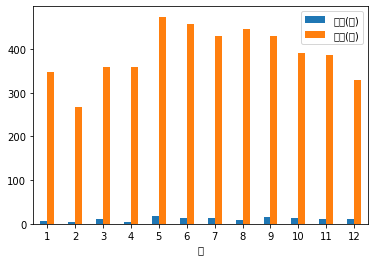

In [231]:
ans2.loc[2014][['사망(명)','부상(명)']].plot(kind='bar', rot=0)

6. 2015년 대비  사망이 가장 많이 증가한 2016년도 월을 구하시오

In [34]:
ans2.loc[[[2015, 2016]]['사망(명)'] == ]

년도    월 
2015  1      8
      2      8
      3      4
      4     10
      5      9
      6      8
      7      7
      8     19
      9     10
      10    14
      11     3
      12     8
2016  1      5
      2      6
      3      7
      4      7
      5     13
      6     12
      7      9
      8      7
      9     13
      10    10
      11     5
      12     4
Name: 사망(명), dtype: int64